# Clustering Algorithm

## 1. Loading and Preprocessing

In [49]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [50]:
from sklearn import datasets
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [51]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
data.shape

(150, 4)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [54]:
null_values=data.isnull().sum()
print("The null values in each column:\n",null_values)

The null values in each column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [55]:
data.duplicated().sum()

1

In [8]:
data=data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

There is only one duplicate value, removed using drop function.

## 2. Clustering Algorithm Implementation

#### A) KMeans Clustering


* Brief Description of How KMeans Clustering Works.

KMeans clustering is an unsupervised machine learning algorithm that groups data into a predefined number of clusters (k).

It works through the following steps:

     Randomly initialize k centroids (cluster centers).

     Assign each data point to the nearest centroid based on distance (usually Euclidean distance).

     Recompute the centroids by calculating the mean of the points assigned to each cluster.

     Repeat the assignment and update steps until the centroids no longer change significantly (i.e., convergence).

The goal is to minimize the "inertia" — the sum of squared distances between points and their assigned cluster centers.

* Why KMeans Clustering is Suitable for the Iris Dataset.

   The Iris dataset contains measurements of flowers (sepal length, sepal width, petal length, and petal width), which naturally form clusters based on species.

   Since KMeans is good at grouping data based on feature similarities, it can effectively identify the inherent groupings in the Iris dataset without knowing the species labels.

   The Iris dataset is relatively small and low-dimensional, making it ideal for KMeans, which performs best when clusters are roughly spherical and well-separated.

* Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.


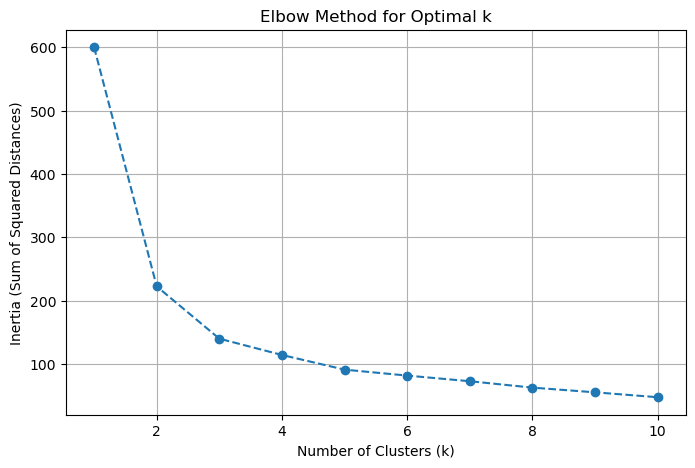

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scaling the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Elbow Method to Determine Optimal Number of Clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)
plt.show()


In [57]:
# Choose Optimal Number of Clusters 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)


In [58]:
cluster_labels=kmeans.fit_predict(scaled_features)

In [59]:
data["Cluster"]=kmeans.labels_
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

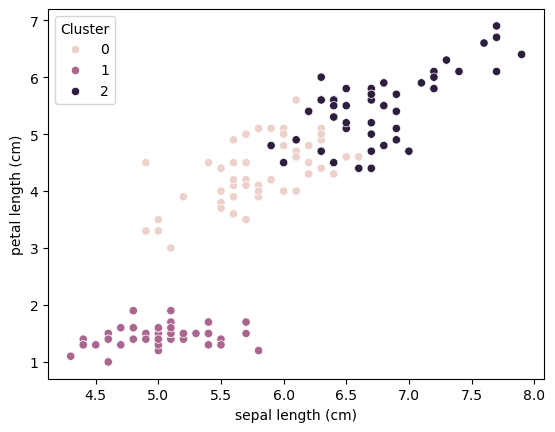

In [60]:
sns.scatterplot(data=data,x="sepal length (cm)",y="petal length (cm)",hue="Cluster")

In [61]:
data["Cluster"].unique()

array([1, 2, 0])

In [64]:
# Evaluate Model Performance
# 1. Silhouette Score
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# 2. Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")

from sklearn.metrics import calinski_harabasz_score

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_features, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

Silhouette Score: 0.46
Davies-Bouldin Index: 0.83
Calinski-Harabasz Index: 241.90


#### B) Hierarchical Clustering

* Brief Description of How Hierarchical Clustering Works.

Hierarchical clustering is an unsupervised machine learning algorithm that groups data into a hierarchy of clusters.
    
 There are two main types:

    > Agglomerative (Bottom-Up):

  Start with each data point as its own cluster.

  Iteratively merge the closest pairs of clusters.

  Continue until all points belong to a single cluster or a stopping condition is met.

    > Divisive (Top-Down):

  Start with all data points in one large cluster.

  Recursively split the cluster into smaller ones.

The result can be visualized using a dendrogram, which shows the merging (or splitting) process.



*  Why Hierarchical Clustering is Suitable for the Iris Dataset.
  
The Iris dataset is relatively small (only 150 samples), making it efficient for hierarchical clustering, which can be computationally expensive for very large datasets.

It provides a dendrogram, allowing us to visually assess how data points form clusters at different levels.

It does not require us to specify the number of clusters initially (unlike KMeans).

Since the Iris dataset has natural groupings (three species), hierarchical clustering can help uncover these groupings without prior knowledge.

* Apply Hierarchical Clustering to the Preprocessed Iris Dataset and Visualize the Clusters.

In [65]:
 import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering


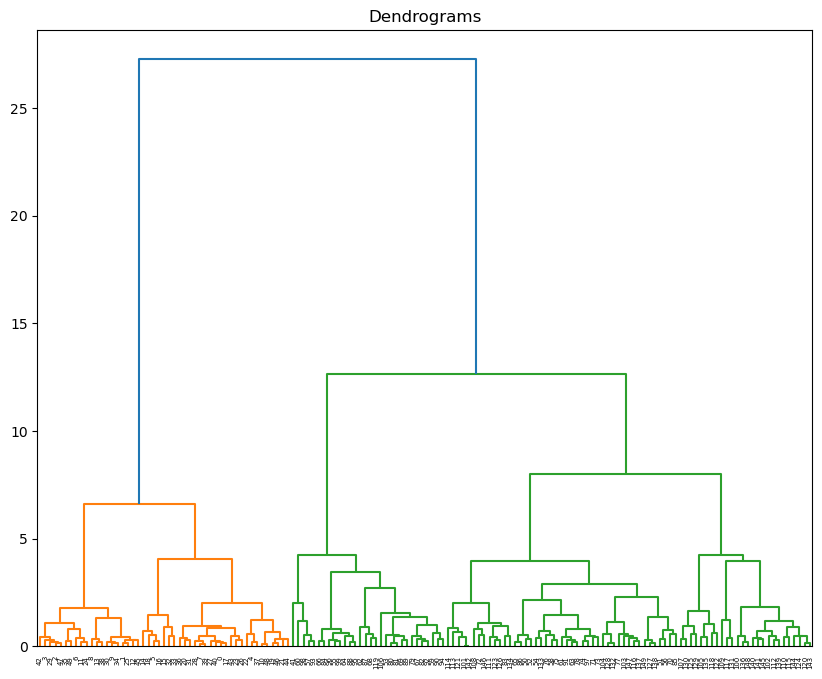

In [66]:
# Plotting a Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage (scaled_features, method='ward'))

In [67]:
clusters=AgglomerativeClustering()
clusters.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
data['cluster2']=clusters.fit_predict(data)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,cluster2
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [69]:
data["cluster2"].unique()

array([1, 0], dtype=int64)

In [70]:
uniquecolor=set(dend['color_list'])
uniquecolor

{'C0', 'C1', 'C2'}

In [71]:
optimal_number_of_clusters=len(uniquecolor)-1
optimal_number_of_clusters

2

In [72]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering (Hierarchical Clustering)
clusters = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = clusters.fit_predict(scaled_features)

# Adding labels to the data (optional, for reference)
data['Hierarchical_Cluster'] = hierarchical_labels


In [73]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Calculate Silhouette Score
sil_score = silhouette_score(scaled_features, hierarchical_labels)
print(f"Silhouette Score: {sil_score:.2f}")

# 2. Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_features, hierarchical_labels)
print(f"Davies-Bouldin Index: {db_score:.2f}")

# 3. Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_features, hierarchical_labels)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")


Silhouette Score: 0.45
Davies-Bouldin Index: 0.80
Calinski-Harabasz Index: 222.72
